# Exercise 2b
First we import the libraries we need:

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from PIL import Image
from os import listdir
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import time

Next, we load the images (you might have to adjust the paths here):

In [14]:
# benno
# train_folder = "C:/Users/bennx/OneDrive/Desktop/mnist-png-format/train/"
# test_folder = "C:/Users/bennx/OneDrive/Desktop/mnist-png-format/test/"

# david
train_folder = "../mnist-png-format/train/"
test_folder = "../mnist-png-format/test/"

def load_images(folder_path):
    data = {int(s): [np.asarray(Image.open(f"{folder_path}/{s}/{p}")).reshape(-1, )
        for p in listdir(f"{folder_path}{s}")
    ] for s in listdir(folder_path)}

    (ys, xs) = reduce(
        lambda a, b: (a[0] + [b[0]]*len(b[1]), a[1] + b[1]),
        data.items(),
        ([], [])
    )

    return np.array(ys), np.array(xs)

y_test, x_test = load_images(test_folder)
y_train, x_train = load_images(train_folder)

print(f"Shape of x_train: {x_train.shape}; shape of y_train: {y_train.shape}.")
print(f"Shape of x_test: {x_test.shape}; shape of y_test: {y_test.shape}.")

Shape of x_train: (60000, 784); shape of y_train: (60000,).
Shape of x_test: (10000, 784); shape of y_test: (10000,).


Now we train the classifier from sklearn (100 neurons in the hidden layer), no optimization yet:

In [15]:
t100 = time.perf_counter()
clf100 = MLPClassifier(hidden_layer_sizes=(100,))
clf100.fit(x_train, y_train)
t100 = time.perf_counter() - t100
print(f"Time spent to execute the classification: {round(t100,2)} seconds.")

Time spent to execute the classification: 201.87 seconds.


We can now apply the classification and use a method of the classifier to calculate the score (accuracy) of our Multi Layer Preceptron classifier:

In [16]:
score100 = clf100.score(x_test, y_test)
print(f"Classifier has {clf100.n_outputs_} outputs. Let us demonstrate the classification of four random images from the test set:")
a, b, c, d = x_test[np.random.choice(list(range(len(x_test))), size=4)]
display(Image.fromarray(a.reshape((28, 28)), 'L'))
display(Image.fromarray(b.reshape((28, 28)), 'L'))
display(Image.fromarray(c.reshape((28, 28)), 'L'))
display(Image.fromarray(d.reshape((28, 28)), 'L'))
print(f"The images above get classified as: {clf100.predict([a, b, c, d])}")
print(f"Accuracy = {score100} for 100 neurons in the hidden layer.")

Classifier has 10 outputs. Let us demonstrate the classification of four random images from the test set:


The images above get classified as: [5 0 6 7]
Accuracy = 0.9626 for 100 neurons in the hidden layer.


Now we experiment with some parameters. <br>
First we optimize the number of neurons in the hidden layer in range [10, 100]:

In [17]:
intervalHL = [10, 20, 40, 80, 100]
for i in intervalHL:
    if(i == 100):
        print(f"Accuracy = {score100} for {i} neurons in the hidden layer with a run time of {round(t100,2)} seconds.")
    else:
        t = time.perf_counter()
        clf = MLPClassifier(hidden_layer_sizes=(i,))
        clf.fit(x_train, y_train)
        score = clf.score(x_test, y_test)
        t = time.perf_counter() - t
        print(f"Accuracy = {score} for {i} neurons in the hidden layer with a run time of {round(t,2)} seconds.")

/home/tav/repos/PatternRecognition_FS22/init/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy = 0.9089 for 10 neurons in the hidden layer with a run time of 259.93 seconds.
Accuracy = 0.9329 for 20 neurons in the hidden layer with a run time of 273.47 seconds.
Accuracy = 0.9481 for 40 neurons in the hidden layer with a run time of 216.82 seconds.
Accuracy = 0.9613 for 80 neurons in the hidden layer with a run time of 215.73 seconds.
Accuracy = 0.9626 for 100 neurons in the hidden layer with a run time of 201.87 seconds.


Since the accuracy increases with the number of neurons in the hidden layer and the sklearn MLP algorithm terminates if a certain level of convergence is reached (and the more neurons the faster the convergence), we see that the run time usually first increases and then decreases. Thus we optimize the learning rate for a MLP with 100 neurons. <br>
Optimizing the learning rate in range [0.001, 0.1]:

In [18]:
intervalLR = [0.001, 0.005, 0.01, 0.5, 1]
for i in intervalLR:
    if(i==0.001):
        print(f"Accuracy = {score100} for learning rate {i} with a run time of {round(t100,2)} seconds.")
    else:
        t = time.perf_counter()
        clf = MLPClassifier(hidden_layer_sizes=(100,), learning_rate_init=i)
        clf.fit(x_train, y_train)
        score = clf.score(x_test, y_test)
        t = time.perf_counter() - t
        print(f"Accuracy = {score} for learning rate {i} with a run time of {round(t,2)} seconds.")

Accuracy = 0.9626 for learning rate 0.001 with a run time of 201.87 seconds.
Accuracy = 0.9203 for learning rate 0.005 with a run time of 54.81 seconds.
Accuracy = 0.7158 for learning rate 0.01 with a run time of 25.96 seconds.
Accuracy = 0.1028 for learning rate 0.5 with a run time of 348.07 seconds.
Accuracy = 0.1135 for learning rate 1 with a run time of 108.47 seconds.


Alright, the accuracy drops insanly fast if we increase the learning rate. Let us keep it then at 0.001 (which is default in sklearn anyway).

We keep the 100 neurons in the hidden layer. Optimizing the number of training iterations in range [1, 400]:

In [19]:
intervalTI = [1, 10, 60, 200, 400]
for i in intervalTI:
    if(i == 200):
        print(f"Accuracy = {score100} for {i} maximal iterations with a run time of {round(t100,2)} seconds.")
    else:
        t = time.perf_counter()
        clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter = i)
        clf.fit(x_train, y_train)
        score = clf.score(x_test, y_test)
        t = time.perf_counter() - t
        print(f"Accuracy = {score} for {i} maximal iterations with a run time of {round(t,2)} seconds.")

/home/tav/repos/PatternRecognition_FS22/init/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy = 0.8858 for 1 maximal iterations with a run time of 6.1 seconds.


/home/tav/repos/PatternRecognition_FS22/init/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy = 0.9444 for 10 maximal iterations with a run time of 29.47 seconds.
Accuracy = 0.9576 for 60 maximal iterations with a run time of 140.94 seconds.
Accuracy = 0.9626 for 200 maximal iterations with a run time of 201.87 seconds.
Accuracy = 0.96 for 400 maximal iterations with a run time of 211.17 seconds.


We get a lot of warnings, since the MLP did not converge before it reached low numbers for the maximal training iterations. But we can see, that the accuracy is increasing as the number of iterations increases and approaches an upper maximum around 0.96. Let us plot the accuracy curve depending on the number of epochs (since we use the stochastic solver ‘adam’, max_iter  determines the number of epochs (how many times each data point will be used)), to avoid a bunch of warnings, we do 10 iterations at a time and repeat this 20 times to get 200 epoches:

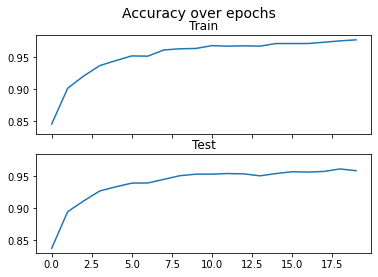

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10)

N_TRAIN_SAMPLES = x_train.shape[0]
N_EPOCHS = 20
N_BATCH = 128
N_CLASSES = np.unique(y_train)

acc_train = []
acc_test = []

epoch = 0
while epoch < N_EPOCHS:
    random_perm = np.random.permutation(x_train.shape[0])
    mini_batch_index = 0
    while True:
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(x_train[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH
        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    acc_train.append(mlp.score(x_train, y_train))
    acc_test.append(mlp.score(x_test, y_test))
    epoch += 1


fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(acc_train)
ax[0].set_title('Train')
ax[1].plot(acc_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

As we can see, the more iterations the smaller the error. But if we increase the epochs, we also have longer run times. So by optimizing the accuracy and taken in account the given ressources, our initial "clf100" was already good enough for a satisfying prediction. Last but not least the loss curve of "clf100" while trainig:

[3.411184450089746, 0.817537821004108, 0.48226291801649324, 0.3479612815298723, 0.27879104277181577, 0.22849940401310187, 0.1915501931950926, 0.17311493088132887, 0.16695113255807922, 0.14350361599156328, 0.13265282598417996, 0.12907928179928294, 0.11734745732421775, 0.12159296411807563, 0.1148952712386881, 0.10576720629530495, 0.11351120341200155, 0.10251009200517537, 0.10312246193497368, 0.09148688048701899, 0.08084494163707451, 0.08026378804568679, 0.08670184889936704, 0.08513501451548808, 0.07795858013745187, 0.07997048126412118, 0.07703490200716775, 0.07081719548159422, 0.07242434201027458, 0.07415929212734106, 0.06776065982776172, 0.0605407649816568, 0.06141962253863133, 0.05905186795597587, 0.06070874379278553, 0.054161803228241955, 0.05365644387205926, 0.049084352810561525, 0.05174579068960401, 0.05446811490619916, 0.059680559183994536, 0.05525676775053374, 0.057039492716827477, 0.047254082745775305, 0.0482141943204322, 0.05275090514659196, 0.052281428275901466, 0.0423109496280

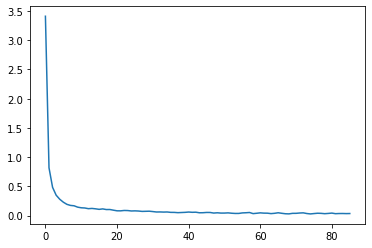

In [21]:
loss_values = clf100.loss_curve_
plt.plot(loss_values)
plt.show()